In [1]:
import numpy as np
import sys
import h5py
import matplotlib.pyplot as plt

from scipy.signal import find_peaks


# plt.ion()
# %matplotlib widget



In [2]:
timetag_signal_list = ['220321', '214735', '213554', '212747']
timetag_signal_control_list = ['220453', '215618', '213730', '212918']
sep_list = [50, 100, 150, 200]
date = '2024-07-30'

mmt = 0
timetag_signal = timetag_signal_list[mmt]
timetag_signal_control = timetag_signal_control_list[mmt]

h5f_signal= h5py.File(rf'Data/Nanowires/DRAGON_{date}_{timetag_signal}_signal.h5','r')
h5f_signal_control= h5py.File(rf'Data/Nanowires/DRAGON_{date}_{timetag_signal_control}_signal.h5','r')
outf_signal = open(f'./DRAGON_{date}_{timetag_signal}_'+'signal'+'.csv','w')
outf_signal_control = open(f'./DRAGON_{date}_{timetag_signal_control}_'+'signal'+'.csv','w')
np.savetxt(outf_signal, h5f_signal['outputdata'][:], '%g', ',')
np.savetxt(outf_signal_control, h5f_signal_control['outputdata'][:], '%g', ',')
outf_signal.close
outf_signal_control.close

data_signal = np.loadtxt(f'DRAGON_{date}_{timetag_signal}_signal.csv', delimiter=',')
data_signal_control = np.loadtxt(f'DRAGON_{date}_{timetag_signal_control}_signal.csv', delimiter=',')



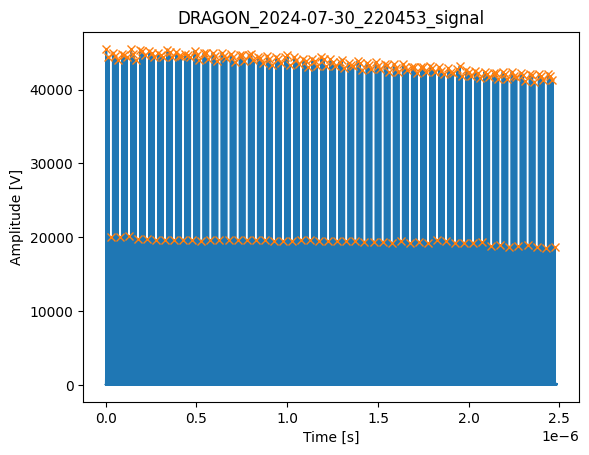

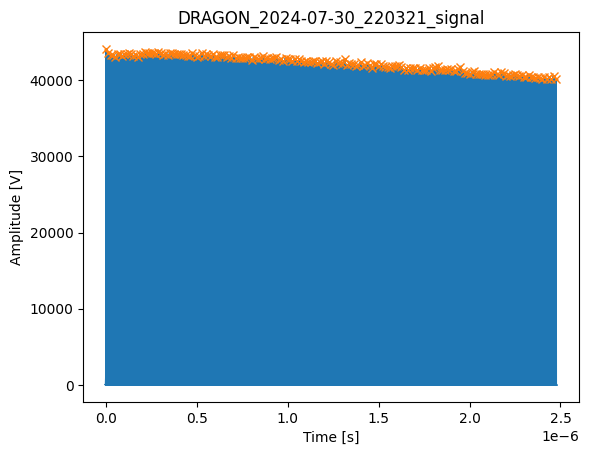

In [3]:
# Plot the data
peaks_total, _ = find_peaks(data_signal_control, prominence=1000, distance=100)
peaks_total_sig_only, _ = find_peaks(data_signal, prominence=1000, distance=100)

T = len(data_signal_control) * 16 
time_axis = np.linspace(0, T*1e-12, len(data_signal_control))
times_peaks = time_axis[peaks_total]

T_signal = len(data_signal) * 16
time_axis_signal = np.linspace(0, T_signal*1e-12, len(data_signal))
times_peaks_signal = time_axis_signal[peaks_total_sig_only]


plt.figure()
plt.plot(time_axis, data_signal_control)
plt.plot(time_axis[peaks_total], data_signal_control[peaks_total], 'x')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
# plt.xlim(0.1, 0.13)
plt.title(f'DRAGON_{date}_{timetag_signal_control}_signal')
plt.show()

plt.figure()
plt.plot(time_axis_signal, data_signal)
plt.plot(time_axis_signal[peaks_total_sig_only], data_signal[peaks_total_sig_only], 'x')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [V]')
# plt.xlim(0.1, 0.13)
plt.title(f'DRAGON_{date}_{timetag_signal}_signal')
plt.show()




data_zoom = data_signal_control[10000:13000]






In [4]:
# Average distance between peaks
repetion_rate_signal = np.mean(np.diff(times_peaks_signal))
print(f'Average distance between peaks: {np.mean(np.diff(times_peaks_signal))} s')

Average distance between peaks: 1.2482181582930396e-08 s


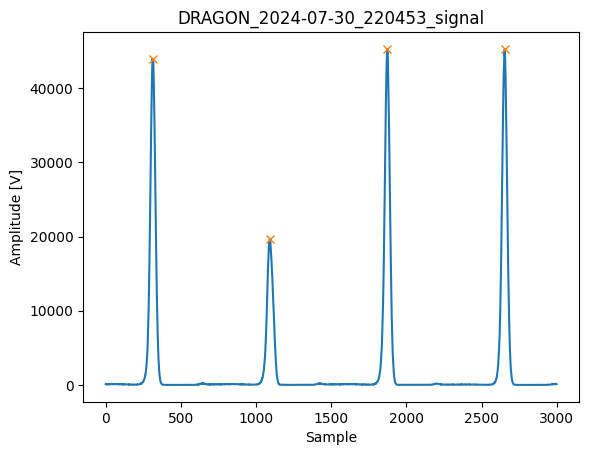

1092
1873
1093


In [5]:
# Detect peaks

peaks, _ = find_peaks(data_zoom, height=0.5, distance=10, prominence=1000)

plt.figure()
plt.plot(data_zoom)
plt.plot(peaks, data_zoom[peaks], "x")
plt.xlabel('Sample')
plt.ylabel('Amplitude [V]')
plt.title(f'DRAGON_{date}_{timetag_signal_control}_signal')
plt.show()


min_peak = np.min(data_zoom[peaks])

# Find the index of the minimum peak
min_peak_index = np.where(data_zoom == min_peak)[0][0]

region = 200

next_peak_index = peaks[peaks > min_peak_index][0]
time_next_peak = time_axis[next_peak_index]
time_min_peak = time_next_peak - repetion_rate_signal
index_min_peak = np.where(time_axis > time_min_peak)[0][0]

print(min_peak_index)
print(next_peak_index)
print(index_min_peak)

RI_region_peak_finder = data_zoom[min_peak_index - region:min_peak_index + region]
RI_region_repetition = data_zoom[index_min_peak - region:index_min_peak + region]
no_RI_region = data_zoom[next_peak_index - region:next_peak_index + region]



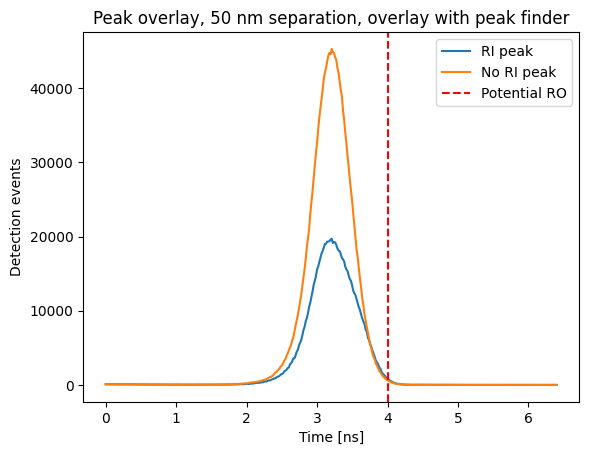

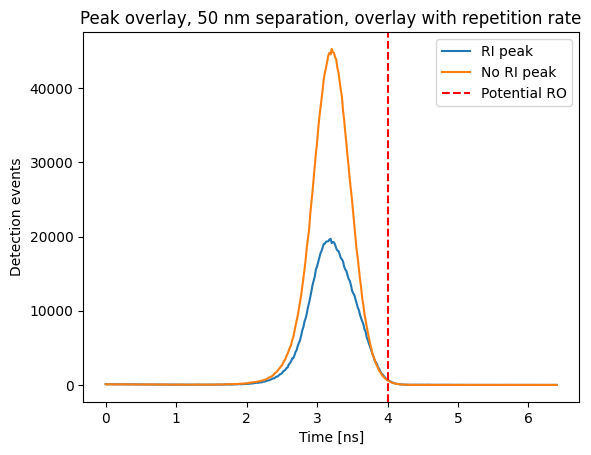

<Figure size 640x480 with 0 Axes>

In [6]:
# Plot the regions of interest
RO_barrier = 250

time_region_peak_finder = np.linspace(0, len(RI_region_peak_finder)*16*1e-12, len(RI_region_peak_finder))*1e9
time_region_repetition = np.linspace(0, len(RI_region_repetition)*16*1e-12, len(RI_region_repetition))*1e9

# RI_region_RO = RI_region[RO_barrier:]
# no_RI_region_RO = no_RI_region[RO_barrier:]

# sum_RI = np.sum(RI_region_RO)
# sum_no_RI = np.sum(no_RI_region_RO)

# # Difference
# diff = sum_RI - sum_no_RI
# print(diff)


plt.figure()
plt.plot(time_region_peak_finder, RI_region_peak_finder, label='RI peak')
plt.plot(time_region_peak_finder, no_RI_region, label='No RI peak')
plt.axvline(x=time_region_peak_finder[RO_barrier], color='r', linestyle='--', label='Potential RO')
plt.xlabel('Time [ns]')
plt.ylabel('Detection events')
plt.title(f'Peak overlay, {sep_list[mmt]} nm separation, overlay with peak finder')
plt.legend()
plt.show()

plt.figure()
plt.plot(time_region_repetition, RI_region_repetition, label='RI peak')
plt.plot(time_region_repetition, no_RI_region, label='No RI peak')
plt.axvline(x=time_region_repetition[RO_barrier], color='r', linestyle='--', label='Potential RO')
plt.xlabel('Time [ns]')
plt.ylabel('Detection events')
plt.title(f'Peak overlay, {sep_list[mmt]} nm separation, overlay with repetition rate')
plt.legend()
plt.show()

plt.savefig(f'Peak_overlay_repetition_{sep_list[mmt]}_nm.png')


In [7]:
def get_region(mmt, plot=False):

    timetag_signal_list = ['220321', '214735', '213554', '212747']
    timetag_signal_control_list = ['220453', '215618', '213730', '212918']
    sep_list = [50, 100, 150, 200]
    date = '2024-07-30'


    timetag_signal = timetag_signal_list[mmt]
    timetag_signal_control = timetag_signal_control_list[mmt]

    data_signal = np.loadtxt(f'DRAGON_{date}_{timetag_signal}_signal.csv', delimiter=',')
    data_signal_control = np.loadtxt(f'DRAGON_{date}_{timetag_signal_control}_signal.csv', delimiter=',')
    
    # Plot the data
    peaks_total, _ = find_peaks(data_signal_control, prominence=1000, distance=100)
    peaks_total_sig_only, _ = find_peaks(data_signal, prominence=1000, distance=100)

    T = len(data_signal_control) * 16 
    time_axis = np.linspace(0, T*1e-12, len(data_signal_control))
    times_peaks = time_axis[peaks_total]

    T_signal = len(data_signal) * 16
    time_axis_signal = np.linspace(0, T_signal*1e-12, len(data_signal))
    times_peaks_signal = time_axis_signal[peaks_total_sig_only]

    if plot:
        plt.figure()
        plt.plot(time_axis, data_signal_control)
        plt.plot(time_axis[peaks_total], data_signal_control[peaks_total], 'x')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude [V]')
        # plt.xlim(0.1, 0.13)
        plt.title(f'DRAGON_{date}_{timetag_signal_control}_signal')
        plt.show()

        plt.figure()
        plt.plot(time_axis_signal, data_signal)
        plt.plot(time_axis_signal[peaks_total_sig_only], data_signal[peaks_total_sig_only], 'x')
        plt.xlabel('Time [s]')
        plt.ylabel('Amplitude [V]')
        # plt.xlim(0.1, 0.13)
        plt.title(f'DRAGON_{date}_{timetag_signal}_signal')
        plt.show()




    data_zoom = data_signal_control[10000:13000]

    # Average distance between peaks
    repetion_rate_signal = np.mean(np.diff(times_peaks_signal))
    # print(f'Average distance between peaks: {np.mean(np.diff(times_peaks_signal))} s')

    # Detect peaks

    peaks, _ = find_peaks(data_zoom, height=0.5, distance=10, prominence=1000)

    if plot:
        plt.figure()
        plt.plot(data_zoom)
        plt.plot(peaks, data_zoom[peaks], "x")
        plt.xlabel('Sample')
        plt.ylabel('Amplitude [V]')
        plt.title(f'DRAGON_{date}_{timetag_signal_control}_signal')
        plt.show()


    min_peak = np.min(data_zoom[peaks])

    # Find the index of the minimum peak
    min_peak_index = np.where(data_zoom == min_peak)[0][0]

    region = 200

    next_peak_index = peaks[peaks > min_peak_index][0]
    time_next_peak = time_axis[next_peak_index]
    time_min_peak = time_next_peak - repetion_rate_signal
    index_min_peak = np.where(time_axis > time_min_peak)[0][0]

    print(min_peak_index)
    print(next_peak_index)
    print(index_min_peak)

    RI_region_peak_finder = data_zoom[min_peak_index - region:min_peak_index + region]
    RI_region_repetition = data_zoom[index_min_peak - region:index_min_peak + region]
    no_RI_region = data_zoom[next_peak_index - region:next_peak_index + region]

    # Plot the regions of interest
    RO_barrier = 250

    time_region_peak_finder = np.linspace(0, len(RI_region_peak_finder)*16*1e-12, len(RI_region_peak_finder))*1e9
    time_region_repetition = np.linspace(0, len(RI_region_repetition)*16*1e-12, len(RI_region_repetition))*1e9

    # RI_region_RO = RI_region[RO_barrier:]
    # no_RI_region_RO = no_RI_region[RO_barrier:]

    # sum_RI = np.sum(RI_region_RO)
    # sum_no_RI = np.sum(no_RI_region_RO)

    # # Difference
    # diff = sum_RI - sum_no_RI
    # print(diff)

    if plot:
        plt.figure()
        plt.plot(time_region_peak_finder, RI_region_peak_finder, label='RI peak')
        plt.plot(time_region_peak_finder, no_RI_region, label='No RI peak')
        plt.axvline(x=time_region_peak_finder[RO_barrier], color='r', linestyle='--', label='Potential RO')
        plt.xlabel('Time [ns]')
        plt.ylabel('Detection events')
        plt.title(f'Peak overlay, {sep_list[mmt]} nm separation, overlay with peak finder')
        plt.legend()
        plt.show()

        plt.figure()
        plt.plot(time_region_repetition, RI_region_repetition, label='RI peak')
        plt.plot(time_region_repetition, no_RI_region, label='No RI peak')
        plt.axvline(x=time_region_repetition[RO_barrier], color='r', linestyle='--', label='Potential RO')
        plt.xlabel('Time [ns]')
        plt.ylabel('Detection events')
        plt.title(f'Peak overlay, {sep_list[mmt]} nm separation, overlay with repetition rate')
        plt.legend()
        plt.show()

    #plt.savefig(f'Peak_overlay_repetition_{sep_list[mmt]}_nm.png')


    return time_region_repetition, RI_region_repetition, no_RI_region








1092
1873
1093
1087
1871
1091
1092
1873
1093
1091
1875
1095


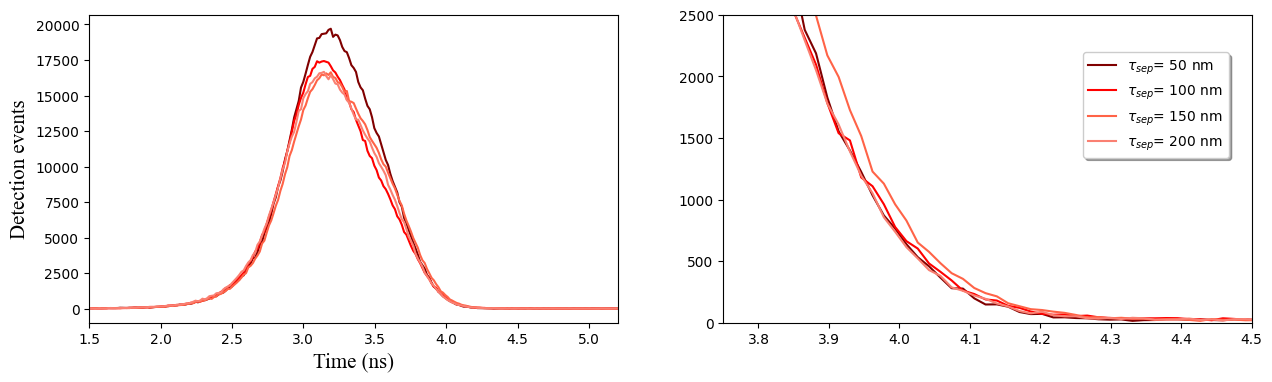

In [9]:
figs, axs = plt.subplots(1, 2, figsize=(15, 4))
colors = ['maroon', 'red', 'tomato', 'salmon']

time_region_repetition = time_region_repetition - time_region_repetition[0]

for mmt in range(4):
    time_region_repetition, RI_region_repetition, no_RI_region = get_region(mmt, plot=False)

    axs[0].plot(time_region_repetition, RI_region_repetition, color = colors[mmt], label=r'$\tau_{sep}$' + f'= {sep_list[mmt]} nm')
    axs[1].plot(time_region_repetition, RI_region_repetition, color = colors[mmt], label=r'$\tau_{sep}$' + f'= {sep_list[mmt]} nm')

    # plt.plot(time_region_repetition, no_RI_region, color = colors[mmt])

    axs[0].set_xlabel('Time (ns)', fontsize=15, fontfamily='Times New Roman')
    axs[0].set_ylabel('Detection events', fontsize=15, fontfamily='Times New Roman')
    axs[0].set_xlim(1.5, 5.2)
    axs[1].set_xlim(3.75, 4.5)
    axs[1].set_ylim(0, 2500)
    # axs[0].xlabel('Time (ns)', fontsize=15, fontfamily='Times New Roman')
    # plt.ylabel('Detection events', fontsize=15, fontfamily='Times New Roman')
    # plt.xlim(1.5, 5.2)
    # # plt.title(f'Peak overlay, overlay with repetition rate')
    plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.9), fancybox=True, shadow=True)

# fig.savefig(f'Images/peak_overlay_repetition_all.pdf', format='pdf')
# plt.show()

plt.savefig(f'Images/peak_overlay_repetition_all.pdf', format='pdf')
plt.show()

Average distance between peaks: 1.2482181582930396e-08 s
1092
1873
1093
Average distance between peaks: 1.2482079885311267e-08 s
1087
1871
1091
Average distance between peaks: 1.2481919884287256e-08 s
1092
1873
1093
Average distance between peaks: 1.2482159885823268e-08 s
1091
1875
1095


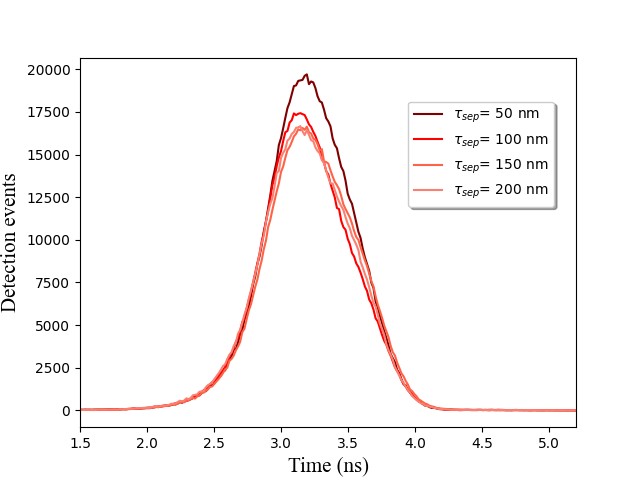

In [31]:
plt.figure()
colors = ['maroon', 'red', 'tomato', 'salmon']

time_region_repetition = time_region_repetition - time_region_repetition[0]

for mmt in range(4):
    time_region_repetition, RI_region_repetition, no_RI_region = get_region(mmt, plot=False)

    plt.plot(time_region_repetition, RI_region_repetition, color = colors[mmt], label=r'$\tau_{sep}$' + f'= {sep_list[mmt]} nm')

    # plt.plot(time_region_repetition, no_RI_region, color = colors[mmt])
    plt.xlabel('Time (ns)', fontsize=15, fontfamily='Times New Roman')
    plt.ylabel('Detection events', fontsize=15, fontfamily='Times New Roman')
    plt.xlim(1.5, 5.2)
    # # plt.title(f'Peak overlay, overlay with repetition rate')
    plt.legend(loc='upper right', bbox_to_anchor=(0.97, 0.9), fancybox=True, shadow=True)

# fig.savefig(f'Images/peak_overlay_repetition_all.pdf', format='pdf')
# plt.show()

plt.savefig(f'Images/peak_overlay_repetition_all.pdf', format='pdf')
plt.show()

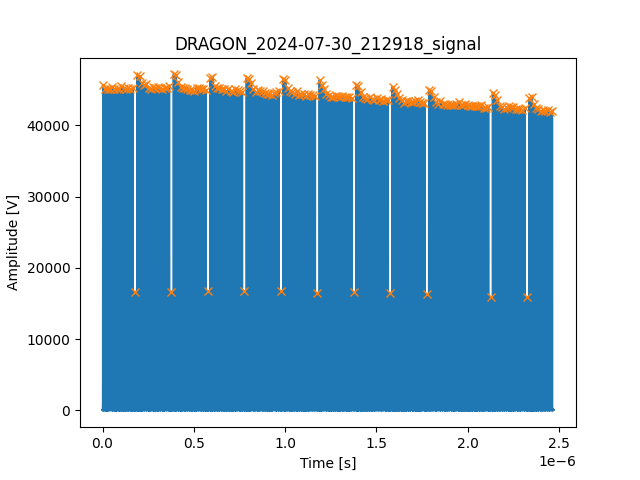

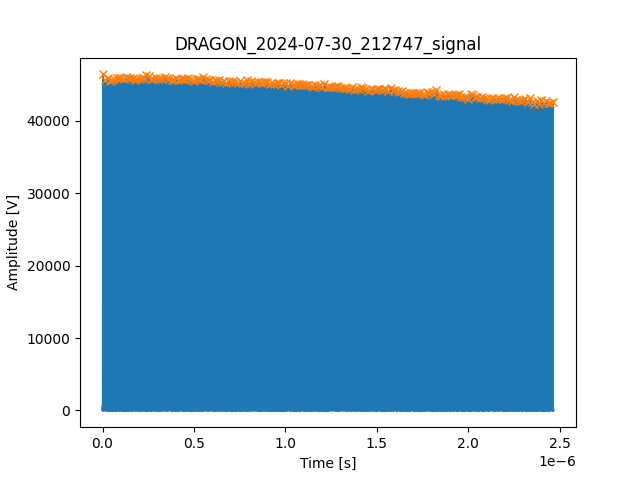

Average distance between peaks: 1.2482355112804987e-08 s


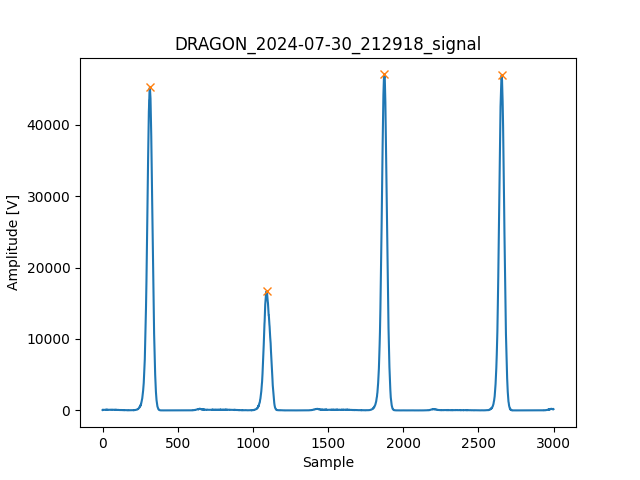

1091
1875
1095


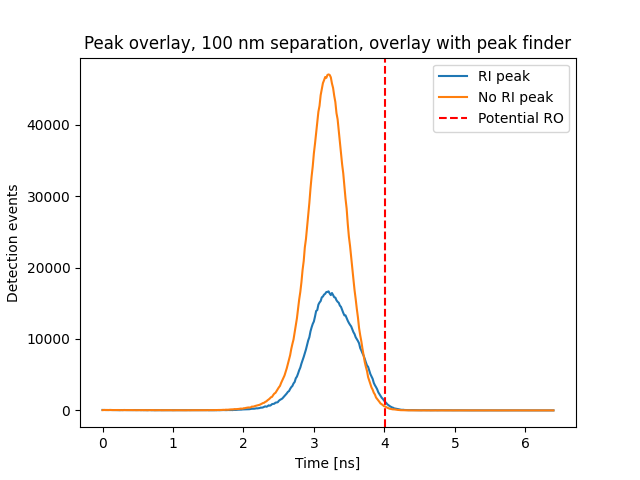

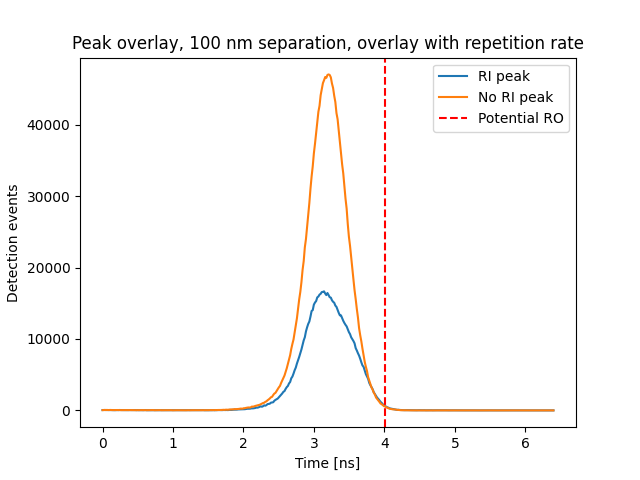

(array([0.        , 0.0160401 , 0.0320802 , 0.0481203 , 0.0641604 ,
        0.0802005 , 0.0962406 , 0.1122807 , 0.1283208 , 0.1443609 ,
        0.160401  , 0.1764411 , 0.1924812 , 0.2085213 , 0.2245614 ,
        0.2406015 , 0.2566416 , 0.2726817 , 0.2887218 , 0.3047619 ,
        0.32080201, 0.33684211, 0.35288221, 0.36892231, 0.38496241,
        0.40100251, 0.41704261, 0.43308271, 0.44912281, 0.46516291,
        0.48120301, 0.49724311, 0.51328321, 0.52932331, 0.54536341,
        0.56140351, 0.57744361, 0.59348371, 0.60952381, 0.62556391,
        0.64160401, 0.65764411, 0.67368421, 0.68972431, 0.70576441,
        0.72180451, 0.73784461, 0.75388471, 0.76992481, 0.78596491,
        0.80200501, 0.81804511, 0.83408521, 0.85012531, 0.86616541,
        0.88220551, 0.89824561, 0.91428571, 0.93032581, 0.94636591,
        0.96240602, 0.97844612, 0.99448622, 1.01052632, 1.02656642,
        1.04260652, 1.05864662, 1.07468672, 1.09072682, 1.10676692,
        1.12280702, 1.13884712, 1.15488722, 1.17

In [73]:
get_region(1, plot=True)